In [1]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import LineString
from shapely.geometry import MultiLineString
from collections import deque
import datetime
from datetime import timedelta
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
DATA_DIR = '../data'
EXPORTS_DIR = f'{DATA_DIR}/exports'

In [210]:
ROUTES = [
    'b3',
    'b6',
    'b8',
    'b9',
    'b11',
    'b12',
    'b16',
    'b25',
    'b26',
    'b35',
    'b37',
    'b43',
    'b44',
    'b48',
    'b52',
    'b61',
    'b63',
    'b65',
    'b68',
    'b82',
]


def get_diff_csv(route):
    df = pd.read_csv(f'{EXPORTS_DIR}/stop_diffs/{route}_stop_diff.csv')
    
    dfx = df.iloc[:, 1:]
    mean = dfx.stack().mean()
    std = dfx.stack().std()
    df.iloc[:, 1:] = dfx.mask((dfx < mean - 3 * std) | (dfx > mean + 3 * std), np.nan)
    df['route'] = route

    return df

diff_df = pd.concat([get_diff_csv(r) for r in ROUTES])

def sort_by_route(s):
    display(s)
    df = pd.DataFrame(s)
    df['route_'] = df.index
    df['len'] = df['route_'].str.len()
    df = df.sort_values(['len', 'route_'])
    df = df.drop(columns=['len', 'route_'])
    return df[0]

In [213]:
#mean_df = sort_by_route(diff_df.groupby(by=['route']).agg('mean').mean(axis=1))
#sum_df = sort_by_route(diff_df.groupby(by=['route']).agg('sum').sum(axis=1))
#median_df = sort_by_route(diff_df.groupby(by=['route']).agg('median')(axis=1))
#std_df = sort_by_route(diff_df.groupby(by=['route']).agg('std').mean(axis=1))
#count_df = sort_by_route(diff_df.groupby(by=['route']).agg('count').mean(axis=1))

In [102]:
#abs_mean_df = sort_by_route(diff_df.groupby(by=['route']).agg(lambda x: x.abs().mean()).mean(axis=1))
#abs_sum_df = sort_by_route(diff_df.groupby(by=['route']).agg(lambda x: x.abs().sum()).sum(axis=1))
#abs_median_df = sort_by_route(diff_df.groupby(by=['route']).agg(lambda x: x.abs().median()).median(axis=1))
#abs_std_df = sort_by_route(diff_df.groupby(by=['route']).agg(lambda x: x.abs().std()).std(axis=1))

In [214]:
route_dict = {}

for route in ROUTES:
    route_df = diff_df[diff_df['route'] == route].select_dtypes(np.number)
    stack = route_df.stack()
    stack_pos = stack[stack > 0]
    mean = stack.mean()
    median = stack.median()
    mean_abs = stack.abs().mean()
    median_abs = stack.abs().median()
    std_abs = stack.abs().std()
    mean_pos = stack_pos.mean()
    median_pos = stack_pos.median()
    std_pos = stack_pos.std()
    std = stack.std()
    route_dict[route] = [mean, mean_abs, median, median_abs, std, std_abs, len(route_df), mean_pos, median_pos, std_pos]
    
stats_df = pd.DataFrame(route_dict)
stats_df = stats_df.transpose()
stats_df.columns=['mean', 'mean_abs', 'median', 'median_abs', 'std', 'std_abs', 'count', 'mean_pos', 'median_pos', 'std_pos']
stats_df

,mean,mean_abs,median,median_abs,std,std_abs,count,mean_pos,median_pos,std_pos
b3,-18.746994,161.567675,-37.567210,139.467641,201.691652,122.139937,73.0,171.883703,151.967650,131.277749
b6,9.691480,123.552777,5.246724,92.597643,158.290135,99.263539,8.0,129.014281,90.124897,115.572802
b8,-3.538623,130.324420,-9.780054,111.579924,159.873355,92.638183,43.0,132.224569,114.851430,96.171705
b9,25.042099,147.035170,19.598084,127.564349,183.242901,112.163957,85.0,158.488270,136.407584,118.057169
b11,11.044680,219.582533,6.909260,179.904755,282.409686,177.890079,91.0,223.844059,185.644763,180.731353
b12,-40.725764,187.278387,-39.708220,152.913354,235.690842,148.737067,104.0,174.056334,143.825826,140.342637
b16,-12.865154,187.218241,-22.069455,151.325648,241.168096,152.492532,31.0,196.405141,157.282218,165.607674
b25,-130.170631,203.077781,-118.360089,169.743246,221.455431,157.280855,83.0,138.297038,118.429035,101.728119
b26,12.204441,185.192633,0.866952,150.079211,240.095833,153.248530,67.0,196.928939,152.807307,163.497271
b35,52.636017,202.813725,68.654723,160.856865,254.764298,162.698138,15.0,217.859827,167.241494,169.318968


In [215]:
stats_df.to_csv(f'{EXPORTS_DIR}/stats_comparison.csv')

In [216]:
stats_df.index = stats_df.index.str.upper()

In [287]:
def plot(v1, v2, title, ymin, ymax, yd=60, legend=['median', 'mean']):
    fig, ax = plt.subplots(figsize=(12, 6))

    X = stats_df.index
    _X = np.arange(len(X))

    ax.grid(color='#ccc', linestyle='-', linewidth=1, axis='y', zorder=2)
    ax.grid(color='#ddd', linestyle='-', linewidth=1, axis='x', zorder=1)
    ax.bar(_X - 0.15, stats_df[v1], color='#57068c', zorder=3, width=0.3)
    ax.bar(_X + 0.15, stats_df[v2], color='#bbb', zorder=3, width=0.3)
    ax.set_ylabel(title, fontsize=16)
    ax.legend(legend, fontsize=14)

    plt.xticks(_X, X, fontsize=14)
    plt.yticks(np.arange(ymin, ymax, yd), fontsize=18)
    plt.show()
    
def plot_dark(v1, v2, title, ymin, ymax, yd=60, legend=['median', 'mean']):
    fig, ax = plt.subplots(figsize=(24, 12))

    X = stats_df.index
    _X = np.arange(len(X))

    ax.grid(color='#666', linestyle='-', linewidth=1, axis='y', zorder=2)
    ax.grid(color='#555', linestyle='-', linewidth=1, axis='x', zorder=1)
    ax.bar(_X - 0.15, stats_df[v1], color='#57068c', zorder=3, width=0.3)
    ax.bar(_X + 0.15, stats_df[v2], color='#777', zorder=3, width=0.3)
    ax.set_ylabel(title, fontsize=28)
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend(legend, fontsize=24)
    ax.set_facecolor('#444')

    plt.xticks(_X, X, fontsize=28)
    plt.yticks(np.arange(ymin, ymax, yd), fontsize=24)
    plt.show()

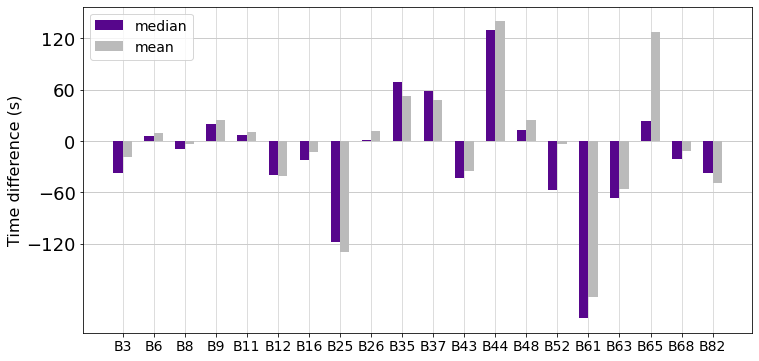

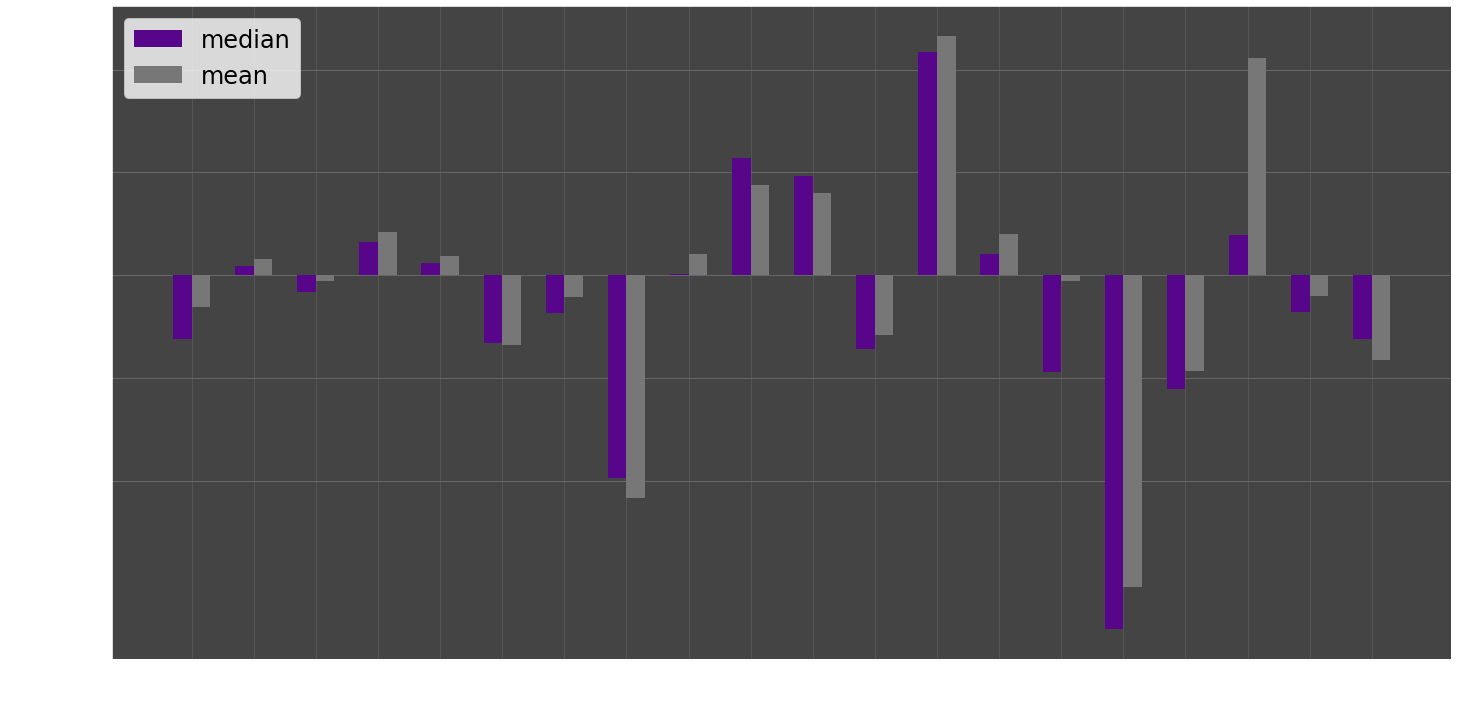

In [288]:
plot('median', 'mean', 'Time difference (s)', -120, 180)
plot_dark('median', 'mean', 'Time difference (s)', -120, 180)

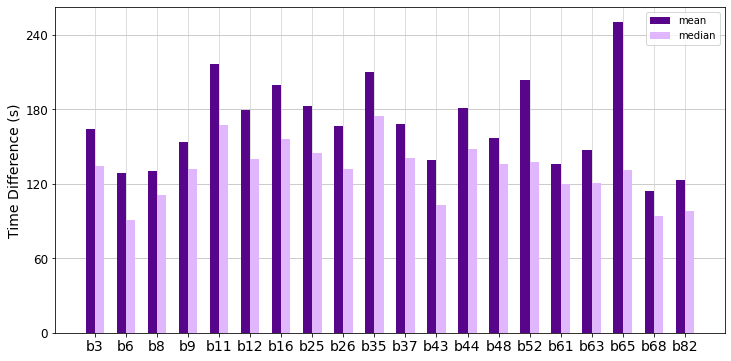

In [192]:
plot('mean_abs', 'median_abs', 0, 300)

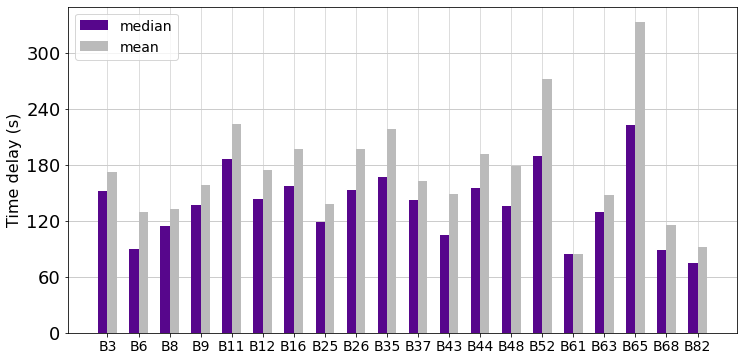

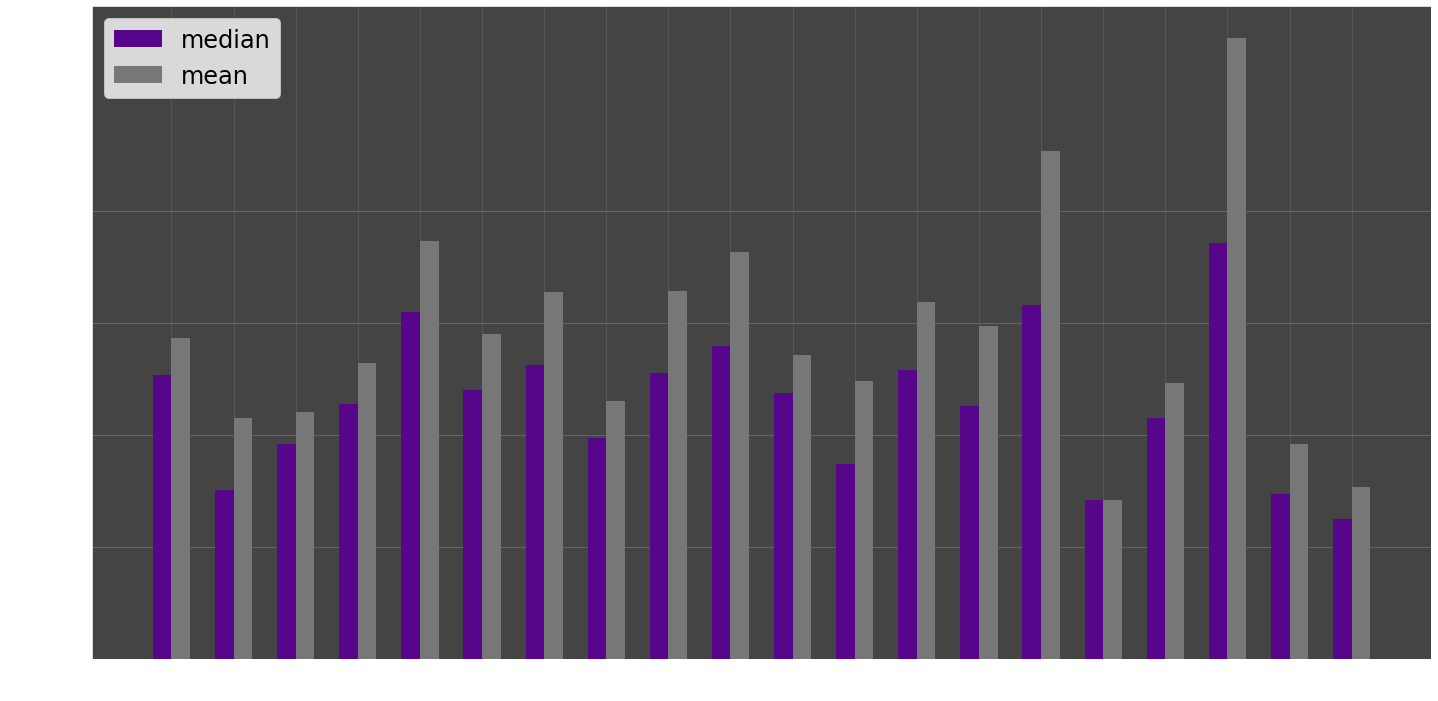

In [289]:
plot('median_pos', 'mean_pos', 'Time delay (s)', 0, 360)
plot_dark('median_pos', 'mean_pos', 'Time delay (s)', 0, 300)

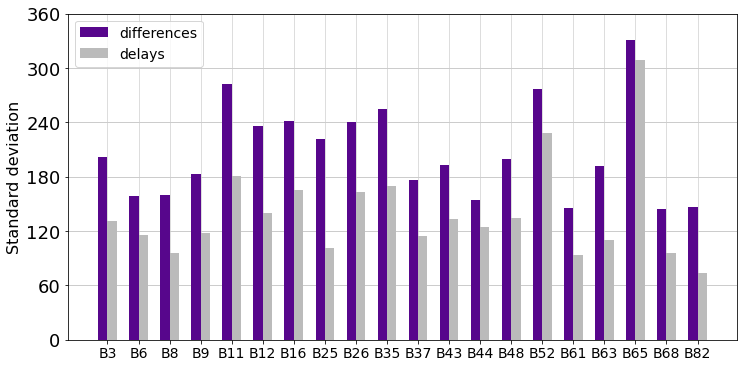

In [290]:
plot('std', 'std_pos', 'Standard deviation', 0, 420, legend=['differences', 'delays'])